<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### The Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan.

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Starting off

In [327]:
import pandas as pd

In [328]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [329]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [330]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [331]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [333]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  



# Section 1: Exploratory Data Analysis

----

**Since we will be attempting to predict loan_status, let's create a countplot as shown below.**

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

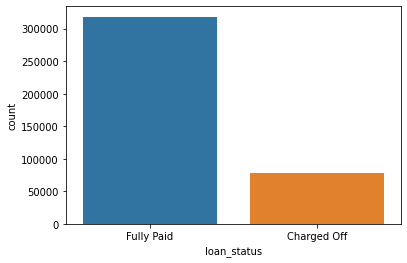

In [335]:
sns.countplot(df['loan_status'])

**Create a histogram of the loan_amnt column.**

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

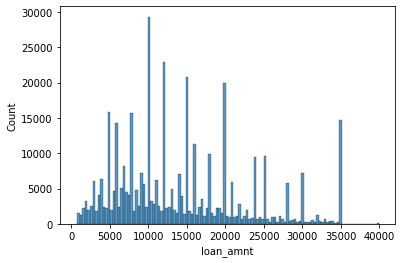

In [336]:
sns.histplot(df['loan_amnt'])

**Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method.**

In [337]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

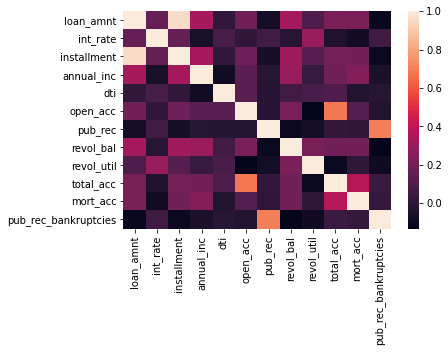

In [338]:
sns.heatmap(df.corr())

**There is almost perfect correlation with the "installment" feature. Lets' print out their descriptions and perform a scatterplot between them.**

In [339]:
df['loan_amnt'].describe

<bound method NDFrame.describe of 0         10000.0
1          8000.0
2         15600.0
3          7200.0
4         24375.0
           ...   
396025    10000.0
396026    21000.0
396027     5000.0
396028    21000.0
396029     2000.0
Name: loan_amnt, Length: 396030, dtype: float64>

In [340]:
df['installment'].describe()

count    396030.000000
mean        431.849698
std         250.727790
min          16.080000
25%         250.330000
50%         375.430000
75%         567.300000
max        1533.810000
Name: installment, dtype: float64

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

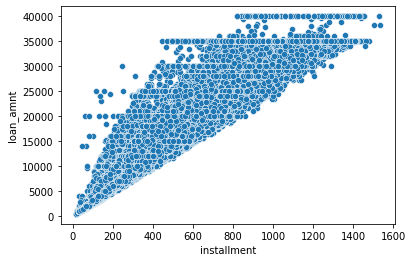

In [341]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)

**Let's make a boxplot showing the relationship between the loan_status and the Loan Amount.**

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

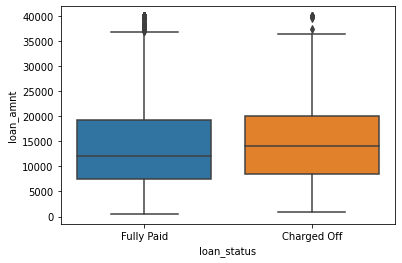

In [342]:
sns.boxplot(data=df,x='loan_status',y='loan_amnt')

**Calculate the summary statistics for the loan amount, grouped by the loan_status.**

In [343]:

df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans**

In [344]:
print(sorted(df['grade'].unique()))
print(sorted(df['sub_grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']
['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


**Let's create a countplot per grade. Set the hue to the loan_status label.**

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='grade', ylabel='count'>

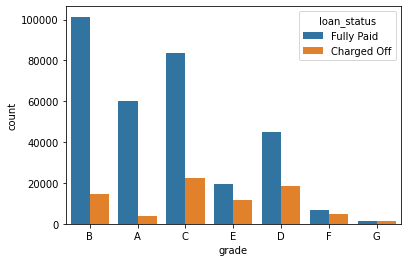

In [345]:
sns.countplot(df['grade'],hue=df['loan_status'])

**Let's display a count plot per subgrade. After creating this plot, let'create a similar plot, but set hue="loan_status"**

<AxesSubplot:ylabel='count'>

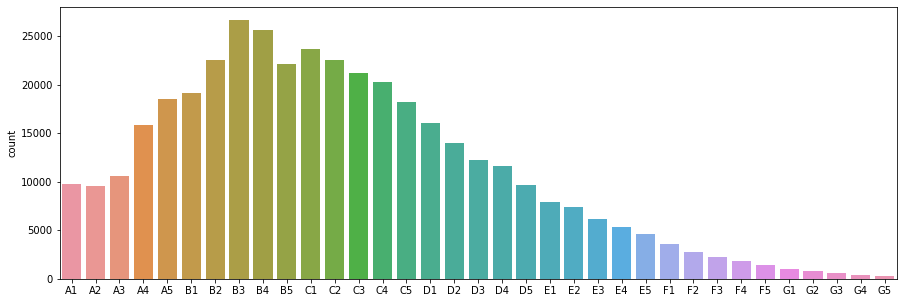

In [346]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x=sorted(df['sub_grade']))


<AxesSubplot:ylabel='count'>

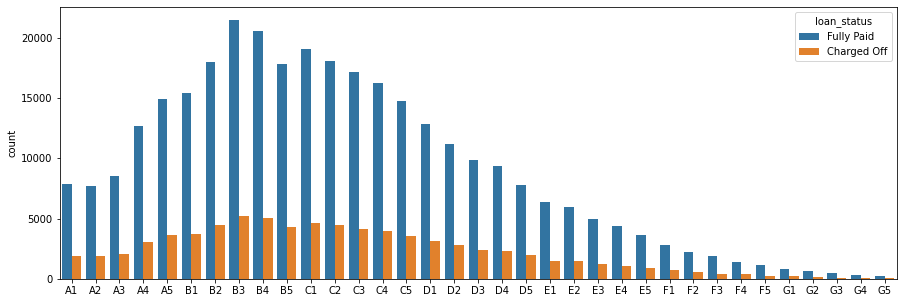

In [347]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x=sorted(df['sub_grade']), hue=df['loan_status'])

**It looks like F and G subgrades don't get paid back that often. Let's isloate those and recreate the countplot just for those subgrades.**

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

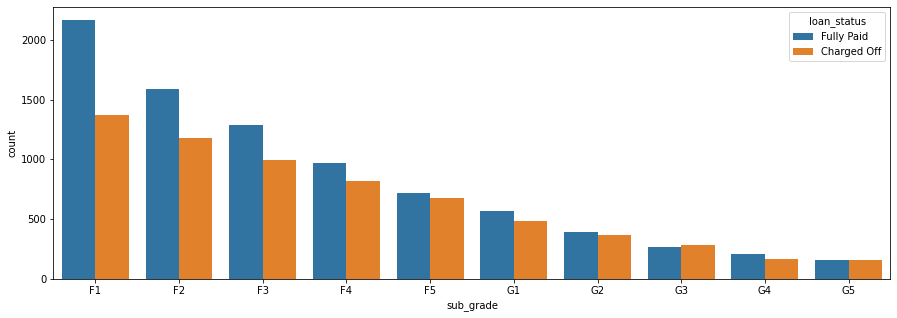

In [348]:
f_and_g = df[(df['grade']=='F' )| (df['grade']=='G' )]

fig, ax = plt.subplots(figsize=(15, 5))
subgrade = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade', hue=df['loan_status'], data= f_and_g, order=subgrade)

**Let's create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [349]:
df['loan_repaid']= df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [350]:
df['loan_repaid']

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_repaid, Length: 396030, dtype: int64

**Let's create a bar plot showing the correlation of the numeric features to the new loan_repaid column.**

<AxesSubplot:>

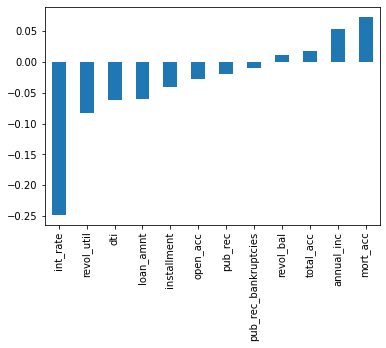

In [351]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

---
---
# Section 2: Data PreProcessing

**Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



In [352]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

**length of the dataframe?**

In [353]:
len(df)

396030

**Create a Series that displays the total count of missing values per column.**

In [354]:
empty = pd.Series(df.isnull().sum())
empty

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Convert this Series to be in term of percentage of the total DataFrame**

In [355]:
empty = empty / 100
empty

loan_amnt                 0.00
term                      0.00
int_rate                  0.00
installment               0.00
grade                     0.00
sub_grade                 0.00
emp_title               229.27
emp_length              183.01
home_ownership            0.00
annual_inc                0.00
verification_status       0.00
issue_d                   0.00
loan_status               0.00
purpose                   0.00
title                    17.55
dti                       0.00
earliest_cr_line          0.00
open_acc                  0.00
pub_rec                   0.00
revol_bal                 0.00
revol_util                2.76
total_acc                 0.00
initial_list_status       0.00
application_type          0.00
mort_acc                377.95
pub_rec_bankruptcies      5.35
address                   0.00
loan_repaid               0.00
dtype: float64

**Let's examine emp_title and emp_length to see whether it will be okay to drop them.**

In [356]:
print(feat_info('emp_title'))
print(feat_info('emp_length'))

The job title supplied by the Borrower when applying for the loan.*
None
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
None


**How many unique employment job titles are there?**

In [357]:
df['emp_title'].nunique()

173105

In [358]:
df['emp_title'].unique()

array(['Marketing', 'Credit analyst ', 'Statistician', ...,
       "Michael's Arts & Crafts", 'licensed bankere',
       'Gracon Services, Inc'], dtype=object)

**Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [359]:
df = df.drop('emp_title',axis=1)

**Let's create a count plot of the emp_length feature column. Challenge: Sort the order of the values.**

In [360]:
df['emp_length']= df['emp_length'].astype('str')

In [361]:
sorted_emp = sorted(df['emp_length'].dropna().unique())

In [362]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emp_length', ylabel='count'>

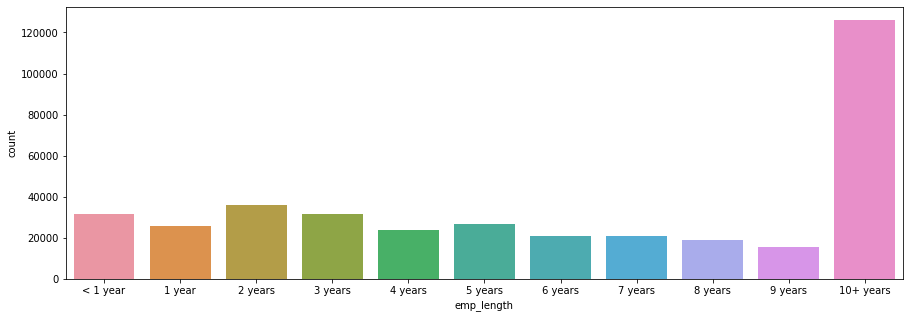

In [363]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(df['emp_length'],order = emp_length_order)

**let's plot out the countplot with a hue separating Fully Paid vs Charged Off**

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='emp_length', ylabel='count'>

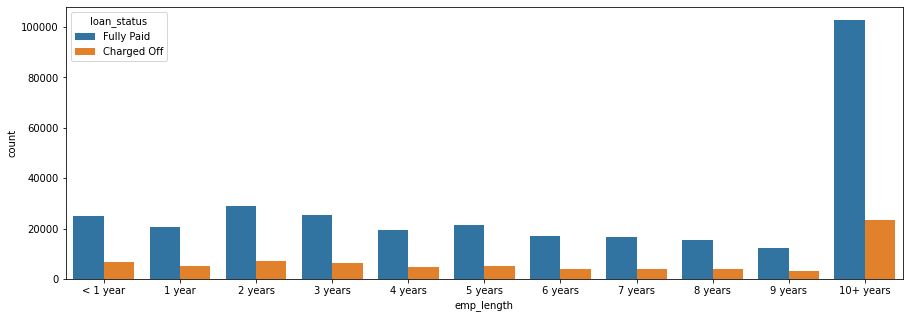

In [364]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(df['emp_length'],order = emp_length_order, hue=df['loan_status'])

**This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan.**

In [365]:
emp_co = df[df['loan_status']=='Charged Off'].groupby("emp_length").count()['loan_status']

In [366]:
emp_fp = df[df['loan_status']=='Fully Paid'].groupby("emp_length").count()['loan_status']

In [367]:
emp_len = emp_co/emp_fp

In [368]:
emp_len = emp_len.dropna()
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
nan          0.379854
Name: loan_status, dtype: float64

<AxesSubplot:xlabel='emp_length'>

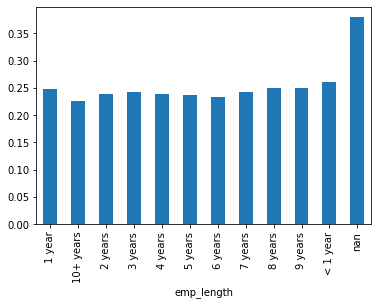

In [369]:
emp_len.plot(kind='bar')

**Charge off rates are extremely similar across all employment lengths. Let's drop the emp_length column.**

In [370]:
df = df.drop('emp_length',axis=1)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


**Revisit the DataFrame to see what feature columns still have missing data.**

In [371]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Review the title column vs the purpose column. Is this repeated information?**

In [372]:
print(df['title'].head(5))
print(df['purpose'].head(5))

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
Name: title, dtype: object
0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
Name: purpose, dtype: object


**The title column is simply a string subcategory/description of the purpose column. Go ahead and drop the title column.**

In [373]:
df = df.drop('title',axis=1)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0



**Let's find out what the mort_acc feature represents**

In [374]:
feat_info('mort_acc')

Number of mortgage accounts.


**Let's create a value_counts of the mort_acc column.**

In [375]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

**There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach**

In [376]:
print("Correlation with the mort_acc column")
df.corr()['mort_acc'].sort_values()

Correlation with the mort_acc column


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

**Looks like the total_acc feature correlates with the mort_acc , this makes sense!**

In [377]:
print("Mean of mort_acc column per total_acc")
df.groupby('total_acc').mean()['mort_acc']

Mean of mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

**Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above.**


In [378]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']    

In [379]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [380]:
df['mort_acc']= df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [381]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Go ahead and remove the rows that are missing those values in those columns with dropna().**

In [382]:
df = df.drop(['revol_util','pub_rec_bankruptcies'], axis=1)

In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            396030 non-null  float64
 1   term                 396030 non-null  object 
 2   int_rate             396030 non-null  float64
 3   installment          396030 non-null  float64
 4   grade                396030 non-null  object 
 5   sub_grade            396030 non-null  object 
 6   home_ownership       396030 non-null  object 
 7   annual_inc           396030 non-null  float64
 8   verification_status  396030 non-null  object 
 9   issue_d              396030 non-null  object 
 10  loan_status          396030 non-null  object 
 11  purpose              396030 non-null  object 
 12  dti                  396030 non-null  float64
 13  earliest_cr_line     396030 non-null  object 
 14  open_acc             396030 non-null  float64
 15  pub_rec          

## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

**Let's list all the columns that are currently non-numeric.**

In [384]:
g = df.columns.to_series().groupby(df.dtypes).groups
g

{int64: ['loan_repaid'], float64: ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'mort_acc'], object: ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address']}

In [385]:
non_numeric =  ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address']

In [386]:
non_numeric

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

**Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [387]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [388]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 396030, dtype: int64

### grade feature

**We already know grade is part of sub_grade, so just drop the grade feature.**

In [389]:
df = df.drop('grade',axis=1)

**Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe.Drop the original subgrade column and to add drop_first=True to your get_dummies call.**

In [390]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [391]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose 
**Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe.**

In [392]:
# verification
verification_dummies = pd.get_dummies(df['verification_status'],drop_first=True)
df = pd.concat([df.drop('verification_status',axis=1),verification_dummies],axis=1)

In [393]:
#application
application_dummies = pd.get_dummies(df['application_type'],drop_first=True)
df = pd.concat([df.drop('application_type',axis=1),application_dummies],axis=1)

In [394]:
#initial list status
initial_list_dummies = pd.get_dummies(df['initial_list_status'],drop_first=True)
df = pd.concat([df.drop('initial_list_status',axis=1),initial_list_dummies],axis=1)

In [395]:
#purpose
purpose_dummies = pd.get_dummies(df['purpose'],drop_first=True)
df = pd.concat([df.drop('purpose',axis=1),purpose_dummies],axis=1)

### home_ownership
**Let's review the value_counts for the home_ownership column.**

In [396]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

**Let's convert these to dummy variables, but replacce NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe.**

In [397]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

### address
**Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.**

In [398]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

**Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.**

In [399]:
zip_dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

### issue_d 

**This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.**

In [400]:
df = df.drop('issue_d', axis=1)

### earliest_cr_line
**This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.**

In [401]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 396030, dtype: object

In [402]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))

In [403]:
df = df.drop('earliest_cr_line',axis=1)

## Train Test Split

**Import train_test_split from sklearn.**

In [404]:
from sklearn.model_selection import train_test_split

**drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.**

In [405]:
df = df.drop('loan_status',axis=1)

In [406]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,total_acc,...,small_business,vacation,wedding,OTHER,OWN,RENT,OTHER,OWN,RENT,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,25.0,...,0,1,0,0,0,1,0,0,1,1990
1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,27.0,...,0,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,26.0,...,0,0,0,0,0,1,0,0,1,2007
3,7200.0,36,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,13.0,...,0,0,0,0,0,1,0,0,1,2006
4,24375.0,60,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,43.0,...,0,0,0,0,0,0,0,0,0,1999


**Set X and y variables to the .values of the features and label.**

In [407]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

----
----

## Grabbing a Sample for Training Time

### Use .sample() to grab a sample of the 490k+ entries to save time on training. Highly recommended for lower RAM computers or if you are not using GPU.

----
----

In [408]:
df = df.sample(frac=0.1,random_state=101)
print(len(df))

39603


**Perform a train/test split with test_size=0.2 and a random_state of 101.**

In [409]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalizing the Data

**Use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.**

In [413]:
from sklearn.preprocessing import MinMaxScaler

In [414]:
scaler = MinMaxScaler()

In [415]:
X_train = scaler.fit_transform(X_train)

In [416]:
X_test = scaler.transform(X_test)

# Creating the Model

**Run the cell below to import the necessary Keras functions.**

In [417]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

**Build a sequential model to will be trained on the data. You have unlimited options here, but here is what the solution uses: a model that goes 78 --> 39 --> 19--> 1 output neuron. **

In [419]:
model = Sequential()

# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

**Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Add in a batch_size of 256.**

In [420]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )


Epoch 1/25
1238/1238 [==============================] - 5s 3ms/step - loss: 0.4720 - val_loss: 0.4573
Epoch 2/25
1238/1238 [==============================] - 4s 4ms/step - loss: 0.4619 - val_loss: 0.4563
Epoch 3/25
1238/1238 [==============================] - 4s 3ms/step - loss: 0.4596 - val_loss: 0.4555
Epoch 4/25
1238/1238 [==============================] - 4s 3ms/step - loss: 0.4582 - val_loss: 0.4554 0s - loss: 0.45
Epoch 5/25
1238/1238 [==============================] - 4s 4ms/step - loss: 0.4573 - val_loss: 0.4547
Epoch 6/25
1238/1238 [==============================] - 4s 3ms/step - loss: 0.4566 - val_loss: 0.4547
Epoch 7/25
1238/1238 [==============================] - 4s 3ms/step - loss: 0.4560 - val_loss: 0.4541
Epoch 8/25
1238/1238 [==============================] - 4s 3ms/step - loss: 0.4552 - val_loss: 0.4542
Epoch 9/25
1238/1238 [==============================] - 4s 3ms/step - loss: 0.4552 - val_loss: 0.4536
Epoch 10/25
1238/1238 [==============================] - 4s 3ms/st

**Save the model.**

In [423]:
from tensorflow.keras.models import load_model

In [424]:
model.save('full_data_project_model.h5')  

# Section 3: Evaluating Model Performance.

**Let's plot out the validation loss versus the training loss.**

In [425]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

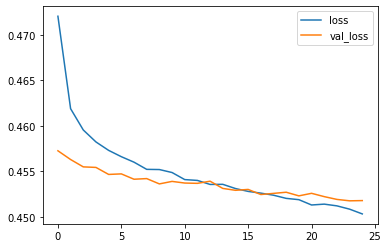

In [426]:
losses[['loss','val_loss']].plot()

**Let's create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [427]:
from sklearn.metrics import classification_report, confusion_matrix

In [428]:
predictions = model.predict_classes(X_test)

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [430]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.55      0.02      0.04     15493
           1       0.81      1.00      0.89     63713

    accuracy                           0.81     79206
   macro avg       0.68      0.51      0.46     79206
weighted avg       0.76      0.81      0.72     79206



In [431]:
confusion_matrix(y_test,predictions)

array([[  293, 15200],
       [  242, 63471]])

**Given the customer below, would I offer this person a loan?**

In [434]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt            2000.00
term                   36.00
int_rate                7.90
installment            62.59
annual_inc          20400.00
                      ...   
RENT                    1.00
OTHER                   0.00
OWN                     0.00
RENT                    1.00
earliest_cr_year     1983.00
Name: 87921, Length: 70, dtype: float64

In [442]:
model.predict_classes(new_customer.values.reshape(1,70))

array([[1]], dtype=int32)

**And did this person actually end up paying back their loan?**

In [444]:
df.iloc[random_ind]['loan_repaid']

0.0